# FIT5202 Assignment 2A : Building Models to Predict Loan Default

## Table of Contents
*  
    * [Part 1 : Data Loading, Transformation and Exploration](#part-1)
    * [Part 2 : Feature extraction and ML training](#part-2)
    * [Part 3 : Applicant Segmentation and Knowledge sharing with K-Mean](#part-3)
    * [Part 4 : Data Ethics, Privacy, and Security](#part-4)
 
Please add code/markdown cells as you need.

# Part 1: Data Loading, Transformation and Exploration <a class="anchor" name="part-1"></a>
## 1.1 Data Loading
In this section, you need to load the given datasets into PySpark DataFrames and use DataFrame functions to process the data, usage of Spark SQL is discouraged. You are allowed to use third-party libraries to format the output. For plotting, different visualisation packages can be used, please ensure that you have included instructions to install the additional packages and the installation will be successful in the provided docker container(in case your marker needs to clear the notebook and rerun it).

### 1.1.1 Data Loading <a class="anchor" name="1.1"></a>
Write the code to create a SparkSession. For creating the SparkSession, you need to use a SparkConf object to configure the Spark app with a proper application name, to ensure the maximum partition size does not exceed 20MB, and to run locally with 4 CPU cores on your machine. (2%)

In [38]:
# Import libraries needed from pyspark
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession 

# Create Spark Configuration Object
master = "local[4]"
app_name = "FIT5202 Assignment 2A"
spark_conf = SparkConf().setMaster(master).setAppName(app_name)\
                        .set("spark.sql.files.maxPartitionBytes", "20M")\
                        .set("spark.driver.memory", "8g")

# Create SparkSession
spark = SparkSession.builder.config(conf = spark_conf).getOrCreate()
sc = spark.sparkContext
sc.setLogLevel('ERROR')

1.1.2 Write code to define the schemas for previous_application and application_data, following the data types suggested in the metadata file. (3%)

In [39]:
from pyspark.sql import functions as F
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType, LongType

pre_app_schema = StructType([
    StructField("id_app", IntegerType()),
    StructField("contract_type", IntegerType()),
    StructField("amt_annuity", FloatType()),
    StructField("amt_application", FloatType()),
    StructField("amt_credit", FloatType()),
    StructField("amt_down_payment", FloatType()),
    StructField("amt_goods_price", FloatType()),
    StructField("hour_appr_process_start", IntegerType()),
    StructField("rate_down_payment", FloatType()),
    StructField("rate_interest_primary", FloatType()),
    StructField("rate_interest_privileged", FloatType()),
    StructField("name_cash_loan_purpose", StringType()),
    StructField("name_contract_status", StringType()),
    StructField("days_decision", IntegerType()),
    StructField("name_payment_type", StringType()),
    StructField("code_reject_reason", StringType()),
    StructField("name_type_suite", StringType()),
    StructField("name_client_type", StringType()),
    StructField("name_goods_category", StringType()),
    StructField("name_portfolio", StringType()),
    StructField("name_product_type", StringType()),
    StructField("channel_type", StringType()),
    StructField("sellerplace_area", IntegerType()),
    StructField("name_seller_industry", StringType()),
    StructField("cnt_payment", FloatType()),
    StructField("name_yield_group", StringType()),
    StructField("product_combination", StringType()),
    StructField("days_first_drawing", FloatType()),
    StructField("days_first_due", FloatType()),
    StructField("days_last_due_1st_version", FloatType()),
    StructField("days_last_due", FloatType()),
    StructField("days_termination", FloatType()),
    StructField("nflag_insured_on_approval", FloatType()),
    StructField("id", LongType())
])

app_schema = StructType([
    StructField("id_app", IntegerType()),
    StructField("target", IntegerType()),
    StructField("contract_type", IntegerType()),
    StructField("gender", StringType()),
    StructField("own_car", StringType()),
    StructField("own_property", StringType()),
    StructField("num_of_children", IntegerType()),
    StructField("income_total", FloatType()),
    StructField("amt_credit", FloatType()),
    StructField("amt_annuity", FloatType()),
    StructField("amt_goods_price", FloatType()),
    StructField("income_type", IntegerType()),
    StructField("education_type", IntegerType()),
    StructField("family_status", IntegerType()),
    StructField("housing_type", IntegerType()),
    StructField("region_population_relative", FloatType()),
    StructField("days_birth", IntegerType()),
    StructField("days_employed", IntegerType()),
    StructField("own_car_age", FloatType()),
    StructField("flag_mobile", IntegerType()),
    StructField("flag_emp_phone", IntegerType()),
    StructField("flag_work_phone", IntegerType()),
    StructField("flag_cont_mobile", IntegerType()),
    StructField("flag_phone", IntegerType()),
    StructField("flag_email", IntegerType()),
    StructField("occupation_type", IntegerType()),
    StructField("cnt_fam_members", FloatType()),
    StructField("weekday_appr_process_start", StringType()),
    StructField("hour_appr_process_start", IntegerType()),
    StructField("organization_type", IntegerType()),
    StructField("credit_score_1", FloatType()),
    StructField("credit_score_2", FloatType()),
    StructField("credit_score_3", FloatType()),
    StructField("days_last_phone_change", FloatType()),
    StructField("amt_credit_req_last_hour", FloatType()),
    StructField("amt_credit_req_last_day", FloatType()),
    StructField("amt_credit_req_last_week", FloatType()),
    StructField("amt_credit_req_last_month", FloatType()),
    StructField("amt_credit_req_last_quarter", FloatType()),
    StructField("amt_credit_req_last_year", FloatType())
])

1.1.3 Using your schemas from step 2, write code to load all CSV files into separate data frames(note: value_dict and loan_default are simple and don’t need schemas). Print the schemas of all data frames. (2%)

In [40]:
# Load CSV files
pre_app_df = spark.read.schema(pre_app_schema).csv('previous_application.csv', header = True)
app_df = spark.read.schema(app_schema).csv('application_data.csv', header = True)
value_df = spark.read.csv('value_dict.csv', header = True, inferSchema = True)
loan_df = spark.read.csv('loan_default.csv', header = True, inferSchema = True)

print('Previous Application Schema:')
pre_app_df.printSchema()

print('Application Data Schema:')
app_df.printSchema()

print('Value Dict Schema:')
value_df.printSchema()

print('Loan Default Schema:')
loan_df.printSchema()

Previous Application Schema:
root
 |-- id_app: integer (nullable = true)
 |-- contract_type: integer (nullable = true)
 |-- amt_annuity: float (nullable = true)
 |-- amt_application: float (nullable = true)
 |-- amt_credit: float (nullable = true)
 |-- amt_down_payment: float (nullable = true)
 |-- amt_goods_price: float (nullable = true)
 |-- hour_appr_process_start: integer (nullable = true)
 |-- rate_down_payment: float (nullable = true)
 |-- rate_interest_primary: float (nullable = true)
 |-- rate_interest_privileged: float (nullable = true)
 |-- name_cash_loan_purpose: string (nullable = true)
 |-- name_contract_status: string (nullable = true)
 |-- days_decision: integer (nullable = true)
 |-- name_payment_type: string (nullable = true)
 |-- code_reject_reason: string (nullable = true)
 |-- name_type_suite: string (nullable = true)
 |-- name_client_type: string (nullable = true)
 |-- name_goods_category: string (nullable = true)
 |-- name_portfolio: string (nullable = true)
 |-- 

### 1.2 Data Transformation and Create Features <a class="anchor" name="1.2"></a>
In this step, we’re going to perform data transformation and create some new features using existing information. (note: you are allowed to use your own code from assignment 1 for some transformation.)  
Perform the following tasks on the application_data data frame:

1.2.1 Create a new column called loan_to_income_ratio(loan to income ratio) defined as amt_credit/income_total.

In [41]:
app_df = app_df.withColumn('loan_to_income_ratio', F.col('amt_credit') / F.col('income_total'))
app_df.select('id_app','amt_credit','income_total', 'loan_to_income_ratio').show(10)

+------+----------+------------+--------------------+
|id_app|amt_credit|income_total|loan_to_income_ratio|
+------+----------+------------+--------------------+
|118100|  667237.5|    247500.0|   2.695909090909091|
|110133| 1374480.0|    112500.0|             12.2176|
|110215|  545040.0|    166500.0|  3.2735135135135134|
|194051|  900000.0|    112500.0|                 8.0|
|110368| 1237684.5|    261000.0|   4.742086206896552|
|110498|  179865.0|    157500.0|               1.142|
|110561| 1256400.0|    157500.0|   7.977142857142857|
|110836|  454500.0|    126000.0|   3.607142857142857|
|110985|  454500.0|     76500.0|  5.9411764705882355|
|109621|  513531.0|     67500.0|   7.607866666666666|
+------+----------+------------+--------------------+
only showing top 10 rows



1.2.2. Perform age bucketing and create a new string column called age_bucket and set the value below:  
age < 25: Y  
25 <= age <35: E  
35 <= age <45: M  
45 <= age < 55: L  
55 <= age < 65: N  
Age >= 65: R

In [42]:
import math
from datetime import datetime, timedelta
from pyspark.sql.functions import udf
from pyspark.sql.types import DateType

def age_calculate(days_birth):
    age = math.floor(days_birth/-365)
    return age

def classify_age(age):
    if age < 25:
        return 'Y'
    elif 25 <= age < 35:
        return 'E'
    elif 35 <= age < 45:
        return 'M'
    elif 45 <= age < 55:
        return 'L'
    elif 55 <= age < 65:
        return 'N'
    elif age >= 65:
        return 'R'
    
# Register the functions as UDFs
age_calculate_udf = udf(age_calculate, IntegerType())
classify_age_udf = udf(classify_age, StringType())

# Calculate applicants' age and create 'age_bucket' column
app_df = app_df.withColumn("age_bucket", classify_age_udf(age_calculate_udf(F.col('days_birth'))))
app_df.select('id_app', 'age_bucket').show(10)

+------+----------+
|id_app|age_bucket|
+------+----------+
|118100|         E|
|110133|         E|
|110215|         L|
|194051|         L|
|110368|         N|
|110498|         N|
|110561|         E|
|110836|         M|
|110985|         L|
|109621|         E|
+------+----------+
only showing top 10 rows



1.2.3 Create a new string column named credit_worthiness. It takes the average value of credit_score_1,2,3 (note: replace null value with 0.5, not 0). If the average >= 0.7, set credit_worthiness to “high”; 0.4 <= average <= 0.7 set to “medium”, < 0.4 set to “low”.

In [43]:
def set_credit_worthiness(avg_score):
    if avg_score >= 0.7:
        return 'high'
    elif 0.4 <= avg_score < 0.7:
        return 'medium'
    elif avg_score < 0.4:
        return 'low'

# replace null value with 0.5
columns = ['credit_score_1', 'credit_score_2', 'credit_score_3']
for col in columns:
    app_df = app_df.withColumn(col, F.coalesce(col, F.lit(0.5)))

# Register the function as UDF
set_credit_worthiness_udf = udf(set_credit_worthiness, StringType())

# Create 'credit_worthiness' column
app_df = app_df.withColumn('credit_worthiness', set_credit_worthiness_udf((F.col('credit_score_1') + F.col('credit_score_2') + F.col('credit_score_3')) / 3))
app_df.select('id_app', 'credit_score_1', 'credit_score_2', 'credit_score_3', 'credit_worthiness').show(10)


+------+-------------------+-------------------+-------------------+-----------------+
|id_app|     credit_score_1|     credit_score_2|     credit_score_3|credit_worthiness|
+------+-------------------+-------------------+-------------------+-----------------+
|118100| 0.6099422574043274| 0.5884348154067993|                0.5|           medium|
|110133| 0.7081763744354248| 0.6865754127502441|                0.5|           medium|
|110215|0.49497994780540466| 0.5847758650779724|0.47225335240364075|           medium|
|194051|                0.5| 0.5962075591087341| 0.6195276975631714|           medium|
|110368|                0.5|   0.64156574010849| 0.3996756076812744|           medium|
|110498|                0.5|0.14626194536685944| 0.5064842104911804|              low|
|110561|0.13320907950401306| 0.5543783903121948|                0.5|              low|
|110836|                0.5| 0.7807371616363525| 0.5797274112701416|           medium|
|110985|                0.5|0.1940303742885

1.2.4 Create 4 columns: num_of_prev_app(number of previous applications), num_of_approved_app (number of approved applications), total_credit (sum of credit of all approved previous applications), total_credit_to_income_ratio (total credit/income).  (note: you need to join previous applications to fill in the values.)

In [44]:
pre_app_df_renamed = pre_app_df.withColumnRenamed('id_app', 'id_app_1')\
                                .withColumnRenamed('amt_credit', 'amt_credit_1')

# join application_data with previous_application
joined_df = app_df.join(pre_app_df_renamed, app_df.id_app == pre_app_df_renamed.id_app_1, how = 'left_outer')

# Create 'num_of_prev_app' column
joined_df_count_pre = joined_df.groupby('id_app').agg(F.count('id').alias('num_of_prev_app'))

# Rename column to avoid duplicate column name
joined_df_count_pre = joined_df_count_pre.withColumnRenamed('id_app', 'id_app_2') 

app_df_1 = app_df.join(joined_df_count_pre, app_df.id_app == joined_df_count_pre.id_app_2, how = 'left_outer')\
                    .drop('id_app_2')                                                

In [45]:
# Create 'num_of_approved_app' column
joined_df_count_approved = joined_df.filter(F.col('name_contract_status') == 'Approved').groupby('id_app')\
                                    .agg(F.count('id').alias('num_of_approved_app'))

# Rename column to avoid duplicate column name
joined_df_count_approved = joined_df_count_approved.withColumnRenamed('id_app', 'id_app_2')

app_df_2 = app_df_1.join(joined_df_count_approved, app_df_1.id_app == joined_df_count_approved.id_app_2, how = 'left_outer')\
                    .drop('id_app_2')

# Replace null value with 0
app_df_2 = app_df_2.withColumn('num_of_approved_app', F.when(F.col('num_of_approved_app').isNull(), 0).otherwise(F.col('num_of_approved_app')))

In [46]:
# Create 'total_credit' column
joined_df_total = joined_df.filter(F.col('name_contract_status') == 'Approved').groupBy('id_app')\
                            .agg(F.sum('amt_credit_1').alias('total_credit'))

# Rename column to avoid duplicate column name
joined_df_total = joined_df_total.withColumnRenamed('id_app', 'id_app_2')

app_df_3 = app_df_2.join(joined_df_total, app_df_2.id_app == joined_df_total.id_app_2, how = 'left_outer')\
                    .drop('id_app_2')

# Replace null value with 0
app_df_3 = app_df_3.withColumn('total_credit', F.when(F.col('total_credit').isNull(), 0).otherwise(F.col('total_credit')))

In [47]:
# Create 'total_credit_to_income_ratio' column
app_df_4 = app_df_3.withColumn('total_credit_to_income_ratio', F.col('total_credit')/F.col('income_total'))
app_df_4.select('id_app', 'num_of_prev_app', 'num_of_approved_app', 'total_credit', 'total_credit_to_income_ratio')\
        .show(10)

+------+---------------+-------------------+------------+----------------------------+
|id_app|num_of_prev_app|num_of_approved_app|total_credit|total_credit_to_income_ratio|
+------+---------------+-------------------+------------+----------------------------+
|100003|              3|                  3|   1452573.0|                      5.3799|
|100007|              6|                  6|    999832.5|           8.229074074074074|
|100008|              5|                  4|    813838.5|           8.220590909090909|
|100016|              4|                  4|    424885.5|                      6.2946|
|100020|              2|                  2|     83412.0|          0.7723333333333333|
|100024|              0|                  0|         0.0|                         0.0|
|100025|              8|                  7|  2363406.25|          11.671141975308641|
|100035|             22|                  8|   1624342.5|           5.553307692307692|
|100039|              4|                  3

1.2.5 Replace education_type, occupation_type, income_type and family_status with matching strings from value_dict (hint: consider reusing code from your A1).

In [48]:
from pyspark.sql.functions import when

def replace_value(df, column, value_df):  
    df = df.join(value_df, F.col(column) == value_df.value, how = 'left_outer')
    df = df.withColumn(column, F.col('key'))
    df = df.drop('value').drop('key')
    return df

# Replace education_type
value_df_edu = value_df.filter(F.col('category') == 'education_type').select('value', 'key')
app_df_edu = replace_value(app_df_4, 'education_type', value_df_edu)

# Replace occupation_type
value_df_occ = value_df.filter(F.col('category') == 'occupation_type').select('value', 'key')
app_df_occ = replace_value(app_df_edu, 'occupation_type', value_df_occ)

# Replace income_type
value_df_in = value_df.filter(F.col('category') == 'income_type').select('value', 'key')
app_df_in = replace_value(app_df_occ, 'income_type', value_df_in)

# Replace family_status
value_df_fam = value_df.filter(F.col('category') == 'family_status').select('value', 'key')
app_df_fam = replace_value(app_df_in, 'family_status', value_df_fam)   

app_df_fam.select('id_app', 'education_type', 'occupation_type', 'income_type', 'family_status').show(10)

+------+--------------------+---------------+--------------------+--------------------+
|id_app|      education_type|occupation_type|         income_type|       family_status|
+------+--------------------+---------------+--------------------+--------------------+
|118100|    Higher education|       Laborers|             Working|             Married|
|110133|Secondary / secon...|    Sales staff|Commercial associate|             Married|
|110215|Secondary / secon...|     Core staff|             Working|Single / not married|
|194051|Secondary / secon...| Security staff|             Working|      Civil marriage|
|110368|    Higher education|        (Empty)|           Pensioner|             Married|
|110498|Secondary / secon...|        (Empty)|           Pensioner|             Married|
|110561|    Higher education|    Accountants|Commercial associate|Single / not married|
|110836|Secondary / secon...|        (Empty)|Commercial associate|             Married|
|110985|    Higher education|   

1.2.6 Join the loan_default data frame and add is_default to application data. We’ll use this column as the label.

In [49]:
# Rename column to avoid duplicate column name
loan_df = loan_df.withColumnRenamed('id_app', 'id_app_1')
joined_loan = app_df_fam.join(loan_df, app_df_fam.id_app == loan_df.id_app_1, how = 'left_outer').drop('id_app_1')

Print 10 records from the application_data data frame.

In [50]:
import pandas as pd

# Use pandas to display dataframe
app_df = joined_loan
pandas_df = app_df.toPandas()
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 100)
print(pandas_df.head(10))

   id_app  target  contract_type gender own_car own_property  num_of_children  income_total  \
0  100003       0              2      F       N            N                0      270000.0   
1  100007       0              2      M       N            Y                0      121500.0   
2  100008       0              2      M       N            Y                0       99000.0   
3  100016       0              2      F       N            Y                0       67500.0   
4  100020       0              2      M       N            N                0      108000.0   
5  100024       0              1      M       Y            Y                0      135000.0   
6  100025       0              2      F       Y            Y                1      202500.0   
7  100035       0              2      F       N            Y                0      292500.0   
8  100039       0              2      M       Y            N                1      360000.0   
9  100050       0              2      F       N   

### 1.3 Exploring the Data <a class="anchor" name="1.3"></a>
1.3.1 With the transformed data frame from 1.2, write code to show the basic statistics (3%) (pandas is allowed for this task):  
a) For each numeric column, show count, mean, stddev, min, max, 25 percentile, 50 percentile, and 75 percentile;  
b) For each non-numeric column, display the top 5 based on counts in descending order;  
c) For each boolean column, display the value and count(i.e., two rows in total).

In [51]:
# replace contract_type with string values
value_df_con = value_df.filter(F.col('category') == 'contract_type').select('value', 'key')
app_df_con = replace_value(app_df, 'contract_type', value_df_con)

# replace housing_type with string values
value_df_housing = value_df.filter(F.col('category') == 'housing_type').select('value', 'key')
app_df_housing = replace_value(app_df_con, 'housing_type', value_df_housing)

# replace organization_type with string values
value_df_or = value_df.filter(F.col('category') == 'organization_type').select('value', 'key')
app_df_or = replace_value(app_df_housing, 'organization_type', value_df_or)

app_df = app_df_or

numeric_column = ['target', 'num_of_children', 'income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price',
                 'region_population_relative', 'days_birth', 'days_employed', 'own_car_age', 'cnt_fam_members',
                 'hour_appr_process_start', 'credit_score_1', 'credit_score_2', 'credit_score_3', 'days_last_phone_change',
                 'amt_credit_req_last_hour', 'amt_credit_req_last_day', 'amt_credit_req_last_week', 'amt_credit_req_last_month',
                 'amt_credit_req_last_quarter', 'amt_credit_req_last_year', 'loan_to_income_ratio', 'num_of_prev_app', 'num_of_approved_app',
                 'total_credit', 'total_credit_to_income_ratio']
nonnumeric_column = ['contract_type', 'gender', 'income_type', 'education_type', 'family_status', 'housing_type',
                   'occupation_type', 'weekday_appr_process_start', 'organization_type', 'age_bucket', 'credit_worthiness']
boolean_column = ['own_car', 'own_property', 'flag_mobile', 'flag_emp_phone', 'flag_work_phone', 'flag_cont_mobile',
                 'flag_phone', 'flag_email', 'is_default']

a) For each numeric column, show count, mean, stddev, min, max, 25 percentile, 50 percentile, and 75 percentile;

In [52]:
import pandas as pd

for col in numeric_column:
    numeric_df = app_df.select(col)
    numeric_pd_df = numeric_df.toPandas()
    with pd.option_context('display.float_format', '{:.6f}'.format):
        print(f"Statistics for column {col}:")
        print(numeric_pd_df.describe() )
        print("\n" + "-" * 30 + "\n")

Statistics for column target:
             target
count 172591.000000
mean       0.081464
std        0.273548
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

------------------------------

Statistics for column num_of_children:
       num_of_children
count    172591.000000
mean          0.419228
std           0.724401
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000

------------------------------

Statistics for column income_total:
          income_total
count    172591.000000
mean     168919.906250
std      299292.031250
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max   117000000.000000

------------------------------

Statistics for column amt_credit:
          amt_credit
count  172591.000000
mean   599010.312500
std    402946.343750
min     45000.000000
25%    270000.000000
50%    512446.500000
75%    808650.000000


b) For each non-numeric column, display the top 5 based on counts in descending order;

In [53]:
for col in nonnumeric_column:
    count_df = app_df.groupBy(col).count().orderBy(F.desc("count"))
    print(f"Top 5 most common values for column {col}:")
    count_df.show(5, truncate = False)

Top 5 most common values for column contract_type:
+---------------+------+
|contract_type  |count |
+---------------+------+
|Revolving loans|156155|
|XNA            |16436 |
+---------------+------+

Top 5 most common values for column gender:
+------+------+
|gender|count |
+------+------+
|F     |113467|
|M     |59121 |
|XNA   |3     |
+------+------+

Top 5 most common values for column income_type:
+--------------------+-----+
|income_type         |count|
+--------------------+-----+
|Working             |89283|
|Commercial associate|40237|
|Pensioner           |30983|
|State servant       |12057|
|Unemployed          |13   |
+--------------------+-----+
only showing top 5 rows

Top 5 most common values for column education_type:
+-----------------------------+------+
|education_type               |count |
+-----------------------------+------+
|Secondary / secondary special|122629|
|Higher education             |42044 |
|Incomplete higher            |5720  |
|Lower secondary    

c) For each boolean column, display the value and count(i.e., two rows in total).

In [54]:
for col in boolean_column:
    count_df = app_df.groupBy(col).count()

    print(f"Value and count for boolean column {col}:")
    count_df.show()

Value and count for boolean column own_car:
+-------+------+
|own_car| count|
+-------+------+
|      Y| 58704|
|      N|113887|
+-------+------+

Value and count for boolean column own_property:
+------------+------+
|own_property| count|
+------------+------+
|           Y|119580|
|           N| 53011|
+------------+------+

Value and count for boolean column flag_mobile:
+-----------+------+
|flag_mobile| count|
+-----------+------+
|          1|172590|
|          0|     1|
+-----------+------+

Value and count for boolean column flag_emp_phone:
+--------------+------+
|flag_emp_phone| count|
+--------------+------+
|             1|141593|
|             0| 30998|
+--------------+------+

Value and count for boolean column flag_work_phone:
+---------------+------+
|flag_work_phone| count|
+---------------+------+
|              1| 34441|
|              0|138150|
+---------------+------+

Value and count for boolean column flag_cont_mobile:
+----------------+------+
|flag_cont_mobile|

1.3.2 Explore the data frame and write code to present two plots worthy of presentation to MoLoCo, describe your plots and discuss the findings from the plots. (8%)  
- One plot must be related to the default. (e.g. what attribute/attributes are correlated to default, what kind of application/applicant has a higher probability of default, etc.)   
- Feel free to choose any for the other plot.  
- Hint: you can use the basic plots (e.g., histograms, line charts, scatter plots) for the relationship between a column and the label; or more advanced plots like correlation plots. If the data is too large for the plotting, consider using sampling before plotting.  
- 150 words max for each plot’s description and discussion  
- Feel free to use any plotting libraries: matplotlib, seabon, plotly, etc.  


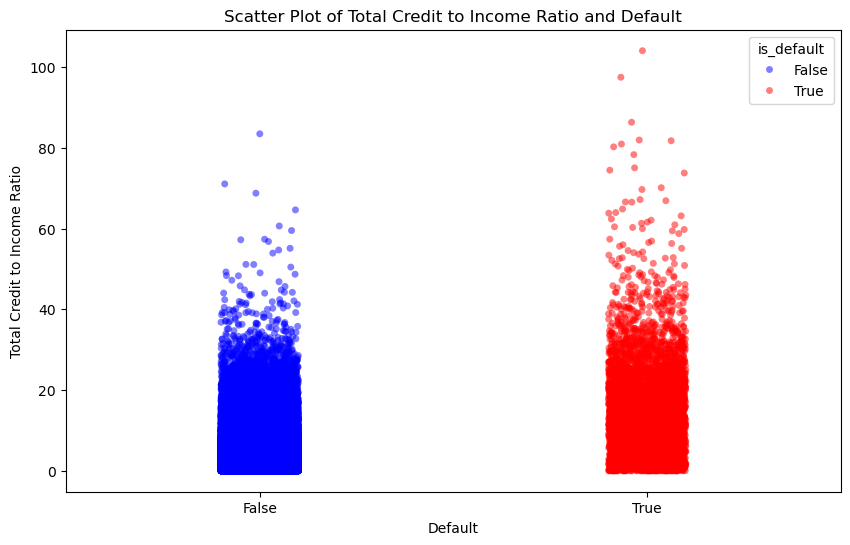

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns
selected_cols = ['total_credit_to_income_ratio', 'is_default']
correlation_data = app_df.select(selected_cols).toPandas()

# Plot the scatter plot
plt.figure(figsize = (10, 6))
sns.stripplot(x = 'is_default', y = 'total_credit_to_income_ratio', hue = 'is_default', data = correlation_data, 
              palette = {True: 'red', False: 'blue'}, jitter = True, alpha = 0.5)
plt.title("Scatter Plot of Total Credit to Income Ratio and Default")
plt.xlabel("Default")
plt.ylabel("Total Credit to Income Ratio")
plt.xticks([0, 1], ['False', 'True'])
plt.show()

The scatter plot illustrates the correlation between two attributes, namely "total_credit_to_income_ratio" and "is_default," within the application dataframe. The x-axis shows the default status (True or False), while the y-axis represents the ratio. Each data point on the plot corresponds to the information of an applicant.

Upon examining the graph, it is evident that the distribution of true and false points below the ratio of 30 is fairly similar. However, as the ratio surpasses 30, the concentration of true points significantly increases, which indicates a higher likelihood of the default value being true with a higher ratio of total credit to income.

<Figure size 1200x800 with 0 Axes>

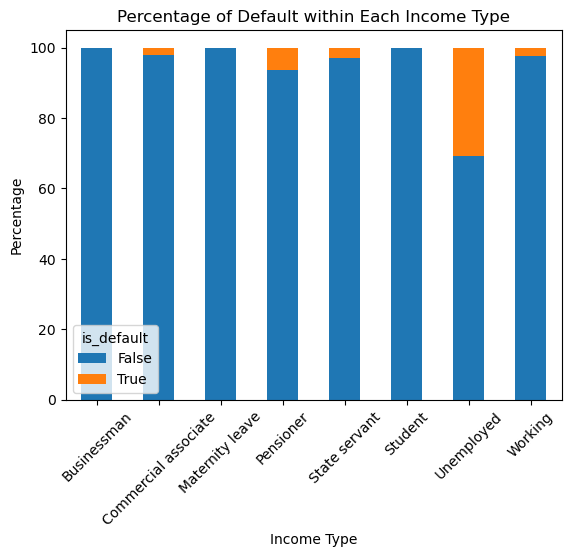

In [56]:
selected_df = app_df.select('income_type', 'is_default')

# Count the number of true within each income type
count_df = selected_df.groupBy('income_type', 'is_default').count()

# Count the total number of applications in each income type
total_count_df = count_df.groupBy('income_type').agg(F.sum('count').alias('total_count'))

# Join the count_df with total_count_df
result_df = count_df.join(total_count_df, 'income_type')

# Calculate the percentage
result_df = result_df.withColumn('percentage', F.col('count') / F.col('total_count') * 100).sort('percentage', ascending = False)

# Plot a bar chart
pandas_result_df = result_df.toPandas()
plt.figure(figsize = (12, 8))
pandas_result_df.groupby(['income_type', 'is_default']).mean()['percentage'].unstack().plot(kind = 'bar', 
                                                                                            stacked = True)
plt.title("Percentage of Default within Each Income Type")
plt.xlabel("Income Type")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

The bar chart demonstrates the percentage distribution of default value (True and False) within each income type. Each bar is stacked to visually represent the proportion of true and false defaults corresponding to a particular income type.

From this chart, it is obvious that the "Unemployed" income type has a higher percentage of true defaults, followed by the "Pensioner" income type. These two types are generally associated with economic instability, which suggest a higher likelihood of true defaults. The chart highlights the connection between income types and default values.

## Part 2. Feature extraction and ML training <a class="anchor" name="part-2"></a>
In this section, you are only allowed to use PySpark DataFrame functions and ML packages for data preparation, model building, and evaluation. Other ML packages, such as scikit-learn, would receive zero marks. Excessive usage of Spark SQL is discouraged.
### 2.1 Discuss the feature selection and prepare the feature columns

2.1.1 Based on the data exploration from 1.2 and considering the use case, discuss the importance of those features. (For example, which features may be useless and should be removed, which feature has a great impact on the label column, which should be transformed) Which features you are planning to use? Discuss the reasons for selecting them and how you create/transform them
- 300 words max for the discussion
- Feel free to add/remove features based on your exploration

To prepare the dataset for machine learning, I start by removing the "id_app" column, which serves as an identifier, and the "target" column, as it is not in use. For the label column, I convert boolean values to integers, assigning 1 for True and 0 for False.

For numerical attributes, Pearson Correlation is adopted to evaluate their relationship with the label (see the below result).
The attributes with correlation value within the range are selected: value >= 0.1 and value <= 0.1. The chosen numerical attributes include days_birth, days_employed, flag_emp_phone, days_last_phone_change, amt_credit_request_last_year, loan_to_income_ratio, num_of_prev_app, num_of_approved_app, total_credit, total_credit_to_income_ratio.
   
Among these numerical attributes, "total_credit" and "total_credit_to_income_ratio" are especially significant as the correlation value is 0.8 and 1.0. Additionally, "days_birth" is replaced by "age_bucket"; "days_employed" will be transformed into "work_year" with the same logic as the transformation for "days_birth" and "days_last_phone_change" will be transformed into "changephone_year".

For categorical attributes, gender, own_car, own_property, income_type, education_type, family_status, housing_type, occapation_type, age_bucket, credit_worthiness are selected because these attributes are particularly relevant to the prediction of defaults.

In summary, all the chosen attributes for machine learning models include 'gender', 'own_car', 'own_property', 'income_type', 'education_type', 'family_status', 'housing_type', 'flag_emp_phone', 'occupation_type','amt_credit_req_last_year', 'age_bucket', 'loan_to_income_ratio', 'credit_worthiness', 'total_credit', 'total_credit_to_income_ratio', 'work_year', 'num_of_prev_app','num_of_approved_app', 'changephone_year','is_default'.

*** Correlation Results ***

In [57]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import when

numeric_cols = ['target', 'num_of_children', 'income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price',
                 'region_population_relative', 'days_birth', 'days_employed', 'own_car_age', 'cnt_fam_members',
                'flag_mobile', 'flag_emp_phone', 'flag_work_phone', 'flag_cont_mobile', 'flag_phone', 'flag_email',
                 'hour_appr_process_start', 'credit_score_1', 'credit_score_2', 'credit_score_3', 'days_last_phone_change',
                 'amt_credit_req_last_hour', 'amt_credit_req_last_day', 'amt_credit_req_last_week', 'amt_credit_req_last_month',
                 'amt_credit_req_last_quarter', 'amt_credit_req_last_year', 'loan_to_income_ratio', 'num_of_prev_app', 
                 'num_of_approved_app', 'total_credit', 'total_credit_to_income_ratio', 'is_default']

df_cor = app_df[numeric_cols]
df_cor = df_cor.withColumn('is_default', when(df_cor['is_default'] == True, 1).otherwise(0))

# Fill null with 0
df_cor = df_cor.fillna(0)

df_cor = df_cor.withColumnRenamed('is_default', 'label')

assembler = VectorAssembler(inputCols=numeric_cols[:-1], outputCol="features", handleInvalid = "keep")
assembled_data = assembler.transform(df_cor)

# Compute the correlation values
correlation_matrix = Correlation.corr(assembled_data, "features").head()

# Extract the correlation valus from the result
corr_matrix = correlation_matrix[0].toArray()

# Display the correlation results
for i in range(len(numeric_cols) - 1):
    print(f"Correlation between {numeric_cols[i]} and label: {corr_matrix[i][-1]}")

Correlation between target and label: -0.01807841206407206
Correlation between num_of_children and label: -0.06383746065375039
Correlation between income_total and label: -0.04315781273848933
Correlation between amt_credit and label: -0.016667599302042514
Correlation between amt_annuity and label: -0.0449886824671642
Correlation between amt_goods_price and label: -0.016365599697350606
Correlation between region_population_relative and label: -0.008317297127011706
Correlation between days_birth and label: -0.19979663076787507
Correlation between days_employed and label: 0.13463261021111117
Correlation between own_car_age and label: -0.041415374885985096
Correlation between cnt_fam_members and label: -0.009309780553431297
Correlation between flag_mobile and label: 0.0018456625868547827
Correlation between flag_emp_phone and label: -0.13574535619977138
Correlation between flag_work_phone and label: -0.060848602031071036
Correlation between flag_cont_mobile and label: 0.019493989694038417


2.1.2 Write code to create/transform the columns based on your discussion above. 


In [58]:
# Transform "days_employed" into "work_year"

def workyear_calculate(days_employed):
    workyear = days_employed/-365
    return workyear

def classify_workyear(workyear):
    if 0 < workyear < 1:
        return '< 1'
    elif 1 <= workyear <= 10:
        return '1-10'
    elif 10 < workyear <= 20:
        return '11-20'
    elif 20 < workyear <= 30:
        return '21-30'
    elif 30 < workyear <= 40:
        return '31-40'
    elif 40 < workyear <= 50:
        return '41-50'
    elif 50 < workyear <= 60:
        return '51-60'
    elif workyear < 0 or workyear == 0:
        return '0'
    
    
# Register the functions as UDFs
workyear_calculate_udf = udf(workyear_calculate, IntegerType())
classify_workyear_udf = udf(classify_workyear, StringType())

# Calculate work year and create 'work_year' column
app_df = app_df.withColumn("work_year", classify_workyear_udf(workyear_calculate_udf(F.col('days_employed'))))
app_df.select('id_app', 'work_year').show(10)

+------+---------+
|id_app|work_year|
+------+---------+
|118100|     1-10|
|110133|     1-10|
|110215|     1-10|
|194051|    11-20|
|110368|        0|
|110498|        0|
|110561|      < 1|
|110836|    11-20|
|110985|     1-10|
|109621|     1-10|
+------+---------+
only showing top 10 rows



In [59]:
# Transform "days_last_phone_change" into "changephone_year"

def changephone_calculate(days_last_phone_change):
    if days_last_phone_change is not None:
        changeyear = days_last_phone_change / -365
        return changeyear
    else:
        return 0
    
def classify_changephone(changeyear):
    if 0 < changeyear < 1:
        return '< 1'
    elif 1 <= changeyear <= 5:
        return '1-5'
    elif 5 < changeyear <= 10:
        return '6-10'
    elif 10 < changeyear <= 15:
        return '11-15'
    elif 15 < changeyear <= 20:
        return '16-20'
    else:
        return '0'
    
# Register the functions as UDFs
changephone_calculate_udf = udf(changephone_calculate, IntegerType())
classify_changephone_udf = udf(classify_changephone, StringType())

# Calculate the change phone year and create 'changephone_year' column
app_df = app_df.withColumn("changephone_year", classify_changephone_udf(changephone_calculate_udf(F.col('days_last_phone_change'))))
app_df.select('id_app', 'changephone_year').show(10)

+------+----------------+
|id_app|changephone_year|
+------+----------------+
|118100|             1-5|
|110133|               0|
|110215|             1-5|
|194051|             1-5|
|110368|             1-5|
|110498|               0|
|110561|             1-5|
|110836|             1-5|
|110985|             1-5|
|109621|               0|
+------+----------------+
only showing top 10 rows



In [60]:
# Fill null with 0 for "amt_credit_req_last_year"
app_df = app_df.fillna(0, subset=['amt_credit_req_last_year'])
app_df.select("id_app", "amt_credit_req_last_year").show(10)

+------+------------------------+
|id_app|amt_credit_req_last_year|
+------+------------------------+
|118100|                     0.0|
|110133|                     0.0|
|110215|                     3.0|
|194051|                     1.0|
|110368|                     0.0|
|110498|                     4.0|
|110561|                     0.0|
|110836|                     1.0|
|110985|                     0.0|
|109621|                     2.0|
+------+------------------------+
only showing top 10 rows



In [61]:
from pyspark.sql.functions import isnan, when, count, col

cols = ['gender', 'own_car', 'own_property', 'income_type', 'education_type', 'family_status', 'housing_type', 
        'flag_emp_phone', 'occupation_type','amt_credit_req_last_year', 'age_bucket', 'loan_to_income_ratio', 
        'credit_worthiness', 'total_credit', 'total_credit_to_income_ratio', 'work_year', 'num_of_prev_app',
        'num_of_approved_app', 'changephone_year','is_default']


df = app_df[cols]

# Change the default value to 1 (True) and 0 (False)
df = df.withColumn('is_default', when(df['is_default'] == True, 1).otherwise(0))

# Change "is_default" to "label"
df = df.withColumnRenamed('is_default', 'label')

# Check for missing data, drop the rows for missing data.
df = df.na.drop()

### 2.2 Preparing Spark ML Transformers/Estimators for features, labels, and models  <a class="anchor" name="2.2"></a>

2.2.1 Write code to create Transformers/Estimators for transforming/assembling the columns you selected above in 2.1, and create ML model Estimators for Random Forest (RF) and Gradient-boosted tree (GBT) model.  
**Please DO NOT fit/transform the data yet**

In [62]:
# Seperate numerical and non-numerical columns
categoryInputCols = ['gender','own_car', 'own_property', 'income_type', 'education_type','family_status', 
                     'housing_type','occupation_type', 'age_bucket', 'credit_worthiness', 'work_year', 
                     'changephone_year']


numericInputCols = ['flag_emp_phone', 'amt_credit_req_last_year','num_of_prev_app','num_of_approved_app',
                    'loan_to_income_ratio', 'total_credit','total_credit_to_income_ratio','label']

In [63]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier

# String Indexer
# Define the output columns
outputCols=[f'{x}_index' for x in categoryInputCols]

# Initialise StringIndexer
indexer = StringIndexer(inputCols = categoryInputCols, outputCols = outputCols, handleInvalid = 'keep')

# One Hot Encoder
# Define input columns and outpu columns for OHE
inputCols_OHE = outputCols
outputCols_OHE = [f'{x}_vec' for x in categoryInputCols] 

# Initialise OneHotEncoder 
encoder = OneHotEncoder(inputCols = inputCols_OHE, outputCols = outputCols_OHE)

# Vector Assembler
# Define input columns and output columns (plus numerical columns)
#inputCols = outputCols_OHE
assemblerInputs = outputCols_OHE + [x for x in numericInputCols if x != 'label']

# Initialise VectorAssembler
assembler = VectorAssembler(inputCols = assemblerInputs, outputCol = 'features')

# Create ML model Estimators for RF and GBT
rf = RandomForestClassifier(labelCol = 'label', featuresCol = 'features', numTrees = 10)
gbt = GBTClassifier(labelCol = 'label', featuresCol = 'features')

2.2.2 Write code to include the above Transformers/Estimators into two pipelines(RF and GBT).
**Please DO NOT fit/transform the data yet**

In [64]:
rf_pipeline = Pipeline(stages = [indexer, encoder, assembler, rf])
gbt_pipeline = Pipeline(stages = [indexer, encoder, assembler, gbt])

### 2.3 Prepare, Train and Evaluate models  
2.3.1 Write code to split the data for training and testing purposes. (Note: if the dataset is too large for your machine to train, sampling/sub-sampling is allowed.)

In [65]:
train, test = df.randomSplit([0.8, 0.2], seed = 2020)

print('Number of records in training set: ', train.count())
print('Number of records in testing set: ', test.count())

Number of records in training set:  138017
Number of records in testing set:  34574


2.3.2 Write code to use the corresponding ML Pipelines to train the models on the training data. And then use the trained models to predict the testing data from 2.3.

In [66]:
# Train the RF model
rf_model = rf_pipeline.fit(train)

# Train the GBT model
gbt_model = gbt_pipeline.fit(train)

# Make predictions on the testing data with models
rf_predictions = rf_model.transform(test)
gbt_predictions = gbt_model.transform(test)

# Display the predictions
rf_predictions.select('features','label','prediction','probability').show()
gbt_predictions.select('features','label','prediction','probability').show()

+--------------------+-----+----------+--------------------+
|            features|label|prediction|         probability|
+--------------------+-----+----------+--------------------+
|(78,[0,3,6,8,16,2...|    0|       0.0|[0.97855845553545...|
|(78,[0,3,6,8,16,2...|    0|       0.0|[0.96922887206139...|
|(78,[0,3,6,8,16,2...|    0|       0.0|[0.97855845553545...|
|(78,[0,3,6,8,16,2...|    0|       0.0|[0.97394204921974...|
|(78,[0,3,6,8,16,2...|    0|       0.0|[0.97394204921974...|
|(78,[0,3,6,8,16,2...|    0|       0.0|[0.97855845553545...|
|(78,[0,3,6,8,16,2...|    0|       0.0|[0.97855845553545...|
|(78,[0,3,6,8,16,2...|    0|       0.0|[0.94721835458229...|
|(78,[0,3,6,8,16,2...|    1|       0.0|[0.97855845553545...|
|(78,[0,3,6,8,16,2...|    0|       0.0|[0.97764762114476...|
|(78,[0,3,6,8,16,2...|    0|       0.0|[0.97855845553545...|
|(78,[0,3,6,8,16,2...|    0|       0.0|[0.97855845553545...|
|(78,[0,3,6,8,16,2...|    0|       0.0|[0.97855845553545...|
|(78,[0,3,6,8,16,2...|  

2.4.2 For both models(RF and GBT) and testing data, write code to display the count of TP/TN/FP/FN. Compute the AUC, accuracy, recall, and precision for the above-threshold/below-threshold label from each model testing result using pyspark MLlib/ML APIs.
1. Draw an ROC plot.
2. Discuss which one is the better model and use metrics to support your claim (no word limit, please keep it concise)

*** The count of TP/TN/FP/FN ***

In [67]:
# Calculate TP/TN/FP/FN

def count_prediction(predictions):
    TP = predictions.filter(F.col('prediction') == 1.0).filter(F.col('label') == 1).count()
    TN = predictions.filter(F.col('prediction') == 0.0).filter(F.col('label') == 0).count()
    FN = predictions.filter(F.col('prediction') == 0.0).filter(F.col('label') == 1).count()
    FP = predictions.filter(F.col('prediction') == 1.0).filter(F.col('label') == 0).count()
    
    return f'TP: {TP}, TN: {TN}, FN: {FN}, FP: {FP}'
    
print('Random Forest: ')
print(count_prediction(rf_predictions))

print('\nGradient_Boosted Tree: ')
print(count_prediction(gbt_predictions))


Random Forest: 
TP: 0, TN: 33523, FN: 1051, FP: 0

Gradient_Boosted Tree: 
TP: 148, TN: 33416, FN: 903, FP: 107


*** The AUC, accuracy, recall, and precision for the above-threshold/below-threshold labe ***

In [68]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import matplotlib.pyplot as plt

# Compute accuracy, precision, recall
def compute_metrics(predictions):
    TP = predictions.filter(F.col('prediction') == 1.0).filter(F.col('label') == 1).count()
    TN = predictions.filter(F.col('prediction') == 0.0).filter(F.col('label') == 0).count()
    FN = predictions.filter(F.col('prediction') == 0.0).filter(F.col('label') == 1).count()
    FP = predictions.filter(F.col('prediction') == 1.0).filter(F.col('label') == 0).count()
    
    accuracy = 'NA'
    precision = 'NA'
    recall = 'NA'

    if TN + TP + FN + FP != 0:
        accuracy = (TN + TP) / (TN + TP + FN + FP)

    if TP + FP != 0:
        precision = TP / (TP + FP)

    if TP + FN != 0:
        recall = TP / (TP + FN)
        
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}') 

    
# Compute above/below threshold values and AUC
def calculate_metrics(predictions):
    evaluator = BinaryClassificationEvaluator(labelCol='label', metricName='areaUnderROC')
    auc = evaluator.evaluate(predictions)
    
    # Default threshold = 0.5
    print('Metrics for above-threshold label:')
    compute_metrics(predictions.filter(F.col('prediction') == 1.0))

    print('\nMetrics for below-threshold label:')
    compute_metrics(predictions.filter(F.col('prediction') == 0.0))
    
    print(f'\nAUC: {auc}')

# Calculate metrics for Random Forest predictions
print('=== Random Forest Metrics ===')
calculate_metrics(rf_predictions)

# Calculate metrics for Gradient-Boosted Tree predictions
print('\n=== Gradient-Boosted Tree Metrics ===')
calculate_metrics(gbt_predictions)

=== Random Forest Metrics ===
Metrics for above-threshold label:
Accuracy: NA
Precision: NA
Recall: NA

Metrics for below-threshold label:
Accuracy: 0.9696014346040377
Precision: NA
Recall: 0.0

AUC: 0.8862498170377253

=== Gradient-Boosted Tree Metrics ===
Metrics for above-threshold label:
Accuracy: 0.5803921568627451
Precision: 0.5803921568627451
Recall: 1.0

Metrics for below-threshold label:
Accuracy: 0.9736880445234418
Precision: NA
Recall: 0.0

AUC: 0.9572122160586568


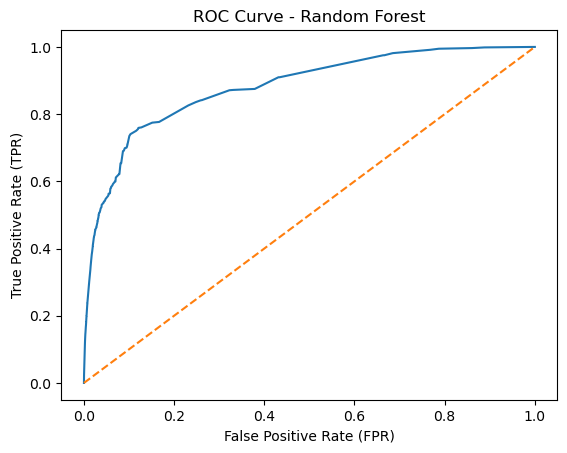

In [69]:
# Plot Random Forest ROC curve
trainingSummary = rf_model.stages[-1].summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'], roc['TPR'])
plt.plot([0, 1], [0, 1],linestyle='--')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('ROC Curve - Random Forest')
plt.show()

/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


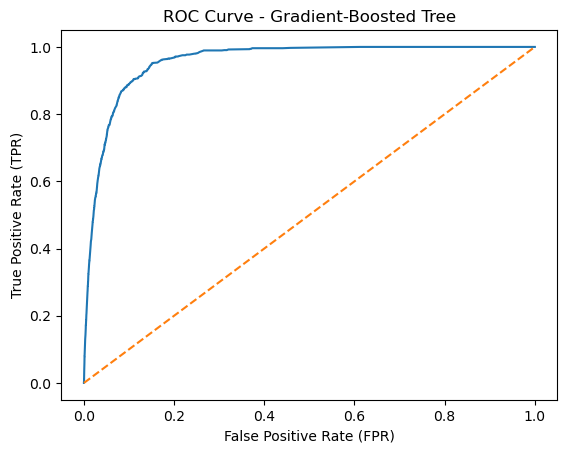

In [70]:
# GBT plotting reference: https://stackoverflow.com/questions/52847408/pyspark-extract-roc-curve
from pyspark.mllib.evaluation import BinaryClassificationMetrics

class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        return [(float(row._1()), float(row._2())) for row in rdd.collect()]

    def plot_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

# Extract 'label' and 'probability' from dataframe
preds = gbt_predictions.select('label', 'probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
roc_curve = CurveMetrics(preds).plot_curve('roc')

# Plot ROC Curve
plt.figure()
x_vals, y_vals = zip(*roc_curve)
plt.plot(x_vals, y_vals)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve - Gradient-Boosted Tree')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

2.4.3 Save the better model, we will need this for Part B of assignment 2.
(note: You may need to go through a few training loops, adjust features, use more data and other techniques to create a better-performing model.)

In [71]:
# Save GBT model 
gbt_model.save('default_gbt_prediction_model')

### Part 3. Applicant Segmentation and Knowledge sharing with K-Mean <a class="anchor" name="part-3"></a>  
Please see the specification for this task and add code/markdown cells.
1. Utilize K-Mean clustering/hyperparameter tuning you have learned in this unit and try to find the optimal K value and train the model.
2. Based on your trained model parameters, make recommendations on how to segment the applicants. Write a paragraph with 300 words maximum.

1. Utilize K-Mean clustering/hyperparameter tuning you have learned in this unit and try to find the optimal K value and train the model.

In [72]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.sql.functions import count, isnan, col, when

df_new = spark.read.csv('application_data.csv', header = True, inferSchema = True)

# Prepare the datagrame for K-means clustering
df_new = df_new.withColumn('gender', when(df_new['gender'] == 'M', 1).when(df_new['gender'] == 'F', 2).otherwise(3))\
            .withColumn('age', age_calculate_udf(F.col('days_birth')))\
            .withColumn('loan_to_income_ratio', F.col('amt_credit') / F.col('income_total'))\
            .select('id_app','gender', 'income_type', 'education_type', 'family_status', 'age', 'loan_to_income_ratio')

df_2 = df_new.drop('id_app')
df_2 = df_2.na.drop() 

df_2_cols = df_2.columns
df_2_assembler = VectorAssembler(inputCols = df_2_cols, outputCol = 'features')
df_2_scaler = StandardScaler(inputCol = 'features', outputCol = 'scaledFeatures')
df_2_pipeline = Pipeline(stages = [df_2_assembler, df_2_scaler])

df_2_model = df_2_pipeline.fit(df_2)
scaled_data = df_2_model.transform(df_2)

# Find the best K value
evaluator = ClusteringEvaluator()
silhouette_arr=[]
for k in range(2,10):
    k_means= KMeans(featuresCol = 'scaledFeatures', k = k)
    model = k_means.fit(scaled_data)
    predictions = model.transform(scaled_data)
    silhouette = evaluator.evaluate(predictions)
    silhouette_arr.append(silhouette)
    print('No of clusters:',k,'Silhouette Score:',silhouette)

No of clusters: 2 Silhouette Score: 0.22575217847308604
No of clusters: 3 Silhouette Score: 0.04049325756989309
No of clusters: 4 Silhouette Score: 0.14268557204023644
No of clusters: 5 Silhouette Score: -0.016519195519834832
No of clusters: 6 Silhouette Score: -0.033622285806179375
No of clusters: 7 Silhouette Score: -0.18200395445180764
No of clusters: 8 Silhouette Score: -0.23547361633161948
No of clusters: 9 Silhouette Score: -0.18981257273379365


2. Based on your trained model parameters, make recommendations on how to segment the applicants. Write a paragraph with 300 words maximum.

The optimal clustering model suggests that the K value is 2, which mean that it is better to divide the applicants into two distinct clusters. To improve the accuracy of default likelihood, specific attributes have been chosen for segmentation. The selected attributes include "gender," "income_type," "education_type," "family_status," and "loan_to_income_ratio. Through an analysis of the relationship between these attributes and defaults (see below), it is recommended to create a cluster composed of individuals with lower or secondary education, widowed family status, pensioner or unemployed income types, an age above 45, and a higher loan-to-income ratio. This cluster is expected to have a higher likelihood of defaults based on previous data. On the contrary, the second cluster contains the applicants who do not possess these characteristics.

*** The relationship between attributes and defaults ***

In [73]:
df_ch = df_new.join(loan_df, df_new.id_app == loan_df.id_app_1, how = 'inner')
df_ch = df_ch.drop('id_app', 'id_app_1')

def calculate_ratio(column):
    selected_df = df_ch.select(column, 'is_default')

    # Count the number of true within each income type
    count_df = selected_df.groupBy(column, 'is_default').count()

    # Count the total number of applications in each income type
    total_count_df = count_df.groupBy(column).agg(F.sum('count').alias('total_count'))

    # Join the count_df with total_count_df
    result_df = count_df.join(total_count_df, column)

    # Calculate the percentage
    result_df = result_df.withColumn('percentage', F.col('count') / F.col('total_count') * 100).sort('percentage', ascending = False)

    # Show the resulting DataFrame
    result_df = result_df.filter(F.col('is_default') == True).sort('percentage', ascending = False).show()

new_column = df_ch.columns

for col in new_column:
    calculate_ratio(col)

+------+----------+-----+-----------+------------------+
|gender|is_default|count|total_count|        percentage|
+------+----------+-----+-----------+------------------+
|     2|      true| 4441|     113467|3.9139132963769203|
|     1|      true|  721|      59121| 1.219532822516534|
+------+----------+-----+-----------+------------------+

+-----------+----------+-----+-----------+------------------+
|income_type|is_default|count|total_count|        percentage|
+-----------+----------+-----+-----------+------------------+
|          7|      true|    4|         13| 30.76923076923077|
|          5|      true| 1945|      30983| 6.277636123035213|
|          1|      true|  368|      12057|3.0521688645600067|
|          2|      true| 2030|      89283|2.2736691195412337|
|          8|      true|  815|      40237| 2.025498918905485|
+-----------+----------+-----+-----------+------------------+

+--------------+----------+-----+-----------+------------------+
|education_type|is_default|count|

### Part 4: Data Ethics, Privacy, and Security <a class="anchor" name="part-4"></a>  
Please see the specification for this task and add markdown cells(word limit: 500).

a. Define the concepts of data ethics, privacy, and security within the big data
domain.

    Data ethics refers to the ethical responsibilities associated with the collection, protection, and utilisation of personally identifiable information and its impact on individuals. Besides, it assists individuals to identify instances of unethical data practices, ensuring data safety, and preventing potential legal issues (Cote, 2021). Data ethics include several areas and principles, such as informed consent, privacy protection, and so on (Data Ethics Unveiled: Principles & Frameworks Explored, n.d.). 
    Data privacy is centered on the management and governance of personal data. This involves the establishment of policies to guarantee that individual data is gathered, shared, and utilised in ethical and suitable manners. 
    As for data security, it is concerned with safeguarding data from malicious attacks and preventing the unauthorised use of stolen data (Jain et al., 2016).

b. Explain the significance of these issues in today’s data-driven world.
   Data Ethics:
    ● Analyze how data ethics can influence big data processing;
    ● Examine real-world examples of how data ethics has been handled, both positively and negatively.
    ● Analyze the balance between technological advancements and ethical responsibilities

    In the realm of big data processing, it is believed that ethical considerations includes informed consent, transparency, fairness, bias mitigation, and data security. These principles are regarded as ethical guidelines, influencing the responsibility of Big Data and protecting individuals rights and privacy (Herschel & Miori, 2017).
    One of the key principles is to obtain informed consent, which emphasises on the importance of informing individuals about collecting and utilising their data in order to foster trust between data collectors and providers. For instance, Apple has successfully implemented active measures to seek the consent from users regarding the usage of their data. This approach helps Apple to build trust through transparent practices (Legal-Apple Privacy Policy-Apple, n.d.). Conversely, the negative example would be Facebook-Cambridge Analytica scandal. The unauthorized usage of Facebook user data for political purposes without explicit consent led to a breach of trust. This incident suggests the meaningful implications of ethical lapses in data processing (Wong, 2019).
    The balance between technological advancements and ethical responsibilities is essential to ensure that the progress benefits the society while avoiding potential harms. It requires a multifaceted approach, such as regulatory frameworks, ethical design, and public awareness. The imperative is to shape a future where technology serves humanity in a responsible and ethical manner, fostering a harmonious coexistence between technological progress and ethical considerations (Herschel & Miori, 2017).

c. Summarize the key findings of your analysis and include a list of references (see the next section).

    Data ethics plays a vital role in today's society particularly due to the widespread use of Big Data. It aims to guarantee data safety and mitigate legal challenges. As we reflect on past real-world experiences, it is evident that achieving a harmonious balance between technology and humanity is essential for making Big Data processing beneficial to all.

## References:
Please add your references below:

Cote, C. (2021, March 16). 5 Principles of Data Ethics for Business. Harvard Business School Online.     https://online.hbs.edu/blog/post/data-ethics

Data Ethics Unveiled: Principles & Frameworks Explored. (n.d.). Atlan.com. https://atlan.com/data-ethics-101/#:~:text=Data%20ethics%20refers%20to%20the

Jain, P., Gyanchandani, M., & Khare, N. (2016). Big data privacy: a technological perspective and review. Journal of Big Data, 3(1). https://doi.org/10.1186/s40537-016-0059-y

Herschel, R., & Miori, V. M. (2017). Ethics & Big Data. Technology in Society, 49(0160-791X), 31–36. https://doi.org/10.1016/j.techsoc.2017.03.003

Legal - Apple Privacy Policy - Apple. (n.d.). Apple Legal. https://www.apple.com/legal/privacy/en-ww/#:~:text=Apple%20uses%20personal%20data%20to

Wong, J. C. (2019, March 18). The Cambridge Analytica Scandal Changed the World – but It Didn’t Change Facebook. The Guardian. https://www.theguardian.com/technology/2019/mar/17/the-cambridge-analytica-scandal-changed-the-world-but-it-didnt-change-facebook